# Intro to Pandas

## Import Pandas

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import and export csv

In [2]:
# To import a csv to a pandas dataframe
url = 'https://raw.githubusercontent.com/ricardopretelt/data-analysis-in-python/master/databases/Datafiniti_Fast_Food_Restaurants.csv'
df = pd.read_csv(url)

In [3]:
# To import just the columns that -you need
df_2 = pd.read_csv(url, usecols=['city', 'name', 'categories'])

In [4]:
# To convert a numpy matrix to a dataframe, and then to csv
df_3= pd.DataFrame(np.array([[-2.58289208,  0.43014843, -1.24082018, 1.59572603],
                     [ 0.99027828, 1.17150989,  0.94125714, -0.14692469],
                     [ 0.76989341,  0.81299683, -0.95068423, 0.11769564],
                     [ 0.20484034,  0.34784527,  1.96979195, 0.51992837]]),columns=list('abcd'))
df_3.to_csv('produced_files/pd.csv')
print(df_3)

          a         b         c         d
0 -2.582892  0.430148 -1.240820  1.595726
1  0.990278  1.171510  0.941257 -0.146925
2  0.769893  0.812997 -0.950684  0.117696
3  0.204840  0.347845  1.969792  0.519928


## To preview data and properties

In [5]:
# To preview data with head
df_2.head()

,categories,city,name
0,American Restaurant and Fast Food Restaurant,Thibodaux,SONIC Drive In
1,Fast Food Restaurants,Thibodaux,SONIC Drive In
2,Fast Food Restaurant,Pigeon Forge,Taco Bell
3,Fast Food,Pigeon Forge,Arby's
4,Fast Food Restaurant,Morrow,Steak 'n Shake


In [6]:
# To learn about the dataset size and formats with info
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categories  10000 non-null  object
 1   city        10000 non-null  object
 2   name        10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [7]:
# To see behaviour of data or get more information
df_2.describe()

,categories,city,name
count,10000,10000,10000
unique,324,2764,571
top,Fast Food Restaurant,Houston,McDonald's
freq,3425,107,1898


In [8]:
# To see and count all the values in a column
df_2["city"].value_counts()

Houston           107
Las Vegas          82
Phoenix            78
Columbus           72
Dallas             66
                 ... 
North Weymouth      1
Cresson             1
Hartwell            1
El Campo            1
Anoka               1
Name: city, Length: 2764, dtype: int64

## To create a dataframe

In [9]:
# To create a dataframe using dictionaries
df_4 = pd.DataFrame({
  'Product ID': [1, 2, 3, 4],
  'Product Name': ["t-shirt", "pants", "skirt", "shoes"],
  'Color': ["white", "blue", "red", "black"]
})
df_4

,Product ID,Product Name,Color
0,1,t-shirt,white
1,2,pants,blue
2,3,skirt,red
3,4,shoes,black


In [10]:
# Another form to create a dataframe naming the columns
data_4 = {'Product ID': [1, 2, 3, 4],
        'Product Name': ["t-shirt", "pants", "skirt", "shoes"],
        'Color': ["white", "blue", "red", "black"]}
df_4 = pd.DataFrame(data_4,columns = ['Product ID','Product Name','Color'])
df_4

,Product ID,Product Name,Color
0,1,t-shirt,white
1,2,pants,blue
2,3,skirt,red
3,4,shoes,black


In [11]:
# To create a dataframe using lists
df_5 = pd.DataFrame([
  [1, 'NY', 100],
  [2, 'CA', 120],
  [3, 'TX', 90],
  [4, 'OR'],
],
  columns=['IDs', 'Place', 'Employees'
  ])
df_5

,IDs,Place,Employees
0,1,NY,100.0
1,2,CA,120.0
2,3,TX,90.0
3,4,OR,NaN


In [12]:
# To rename the columns use the same column object
df_5.columns = ['ID', 'Place', 'Number of Employees']
df_5

,ID,Place,Number of Employees
0,1,NY,100.0
1,2,CA,120.0
2,3,TX,90.0
3,4,OR,NaN


In [13]:
# To rename a individual column
df_5.rename(columns={
    'Place': 'Location'},
    inplace=True)
df_5

,ID,Location,Number of Employees
0,1,NY,100.0
1,2,CA,120.0
2,3,TX,90.0
3,4,OR,NaN


## To select specific columns and rows

**.loc():** It includes the last element of the range passed in it and can accept boolean input unlike iloc().<br>
**.iloc():** : It does not include the last element of the range passed in it unlike loc().

In [14]:
# To select just the row specified by index. Works the same using .loc() and .iloc()
df_5.loc[2]

ID                      3
Location               TX
Number of Employees    90
Name: 2, dtype: object

In [15]:
# To select specified rows specified by index. Works the same using .loc() and .iloc() 
df_5.iloc[[0,1,3]]

,ID,Location,Number of Employees
0,1,NY,100.0
1,2,CA,120.0
3,4,OR,NaN


In [16]:
# To select all the rows until the specified by index using .loc(). 
#As it is .loc() the last element of the range is included
df_5.loc[:3]

,ID,Location,Number of Employees
0,1,NY,100.0
1,2,CA,120.0
2,3,TX,90.0
3,4,OR,NaN


In [17]:
# To select all the rows until the specified by index using .iloc(). 
#As it is .iloc() the last element of the range is not included
df_5.iloc[:3]

,ID,Location,Number of Employees
0,1,NY,100.0
1,2,CA,120.0
2,3,TX,90.0


In [18]:
# To Select the last 3 rows
LA_TX_OR=df_5.iloc[-3:]
LA_TX_OR

,ID,Location,Number of Employees
1,2,CA,120.0
2,3,TX,90.0
3,4,OR,NaN


In [19]:
# Change index
LA_TX_OR.reset_index(drop=True, inplace=True)
LA_TX_OR

,ID,Location,Number of Employees
0,2,CA,120.0
1,3,TX,90.0
2,4,OR,NaN


In [20]:
# To select rows with 'equal'
df_5[df_5.Location == 'OR']

,ID,Location,Number of Employees
3,4,OR,NaN


In [21]:
# To select rows with 'greater than'
df_5[df_5['Number of Employees'] >= 100]

,ID,Location,Number of Employees
0,1,NY,100.0
1,2,CA,120.0


In [22]:
# To select rows where a value is missing, i.e. it is NaN.
df_5[df_5['Number of Employees'].isnull()==True]

,ID,Location,Number of Employees
3,4,OR,NaN


In [23]:
# To select the rows without missing values
df_5.dropna(axis = 0, how = 'any', inplace = True)
df_5

,ID,Location,Number of Employees
0,1,NY,100.0
1,2,CA,120.0
2,3,TX,90.0


In [24]:
# To select columns with logic using 2 conditions: Inclusion
df_5[(df_5.Location == 'OR')|(df_5.Location == 'CA')]

,ID,Location,Number of Employees
1,2,CA,120.0


In [25]:
# To print a query filtering between 2 columns: Exclusion
df_2[(df_2.name == "McDonald's") & (df_2.city == "New York")]

,categories,city,name
27,Fast Food Restaurant,New York,McDonald's
28,Fast Food Restaurant,New York,McDonald's
2000,Fast Food,New York,McDonald's
2007,Fast Food,New York,McDonald's
2098,Fast Food,New York,McDonald's
2100,Fast Food Restaurant,New York,McDonald's
2106,Fast Food Restaurant,New York,McDonald's
2107,Fast Food Restaurant,New York,McDonald's
8874,Fast Food,New York,McDonald's
9464,Fast Food Restaurant,New York,McDonald's


In [26]:
# To show only not selected values in a column using isin()
top=['NY', 'CA']
df_5.loc[~df_5['Location'].isin(top),'Location']

2    TX
Name: Location, dtype: object

In [27]:
#To select only the columns of interest
df_6=df[['address', 'city', 'name']]
df_6.head()

,address,city,name
0,800 N Canal Blvd,Thibodaux,SONIC Drive In
1,800 N Canal Blvd,Thibodaux,SONIC Drive In
2,206 Wears Valley Rd,Pigeon Forge,Taco Bell
3,3652 Parkway,Pigeon Forge,Arby's
4,2118 Mt Zion Parkway,Morrow,Steak 'n Shake


In [28]:
# To select the columns of interest as before, but using the filter command
df_6=df.filter(['address', 'city', 'name']) 
df_6.head()

,address,city,name
0,800 N Canal Blvd,Thibodaux,SONIC Drive In
1,800 N Canal Blvd,Thibodaux,SONIC Drive In
2,206 Wears Valley Rd,Pigeon Forge,Taco Bell
3,3652 Parkway,Pigeon Forge,Arby's
4,2118 Mt Zion Parkway,Morrow,Steak 'n Shake


In [29]:
# To see only unique values
df.province.unique()

array(['LA', 'TN', 'GA', 'MI', 'CA', 'NY', 'TX', 'OH', 'SC', 'MS', 'IN',
       'MA', 'FL', 'MO', 'PA', 'IL', 'CT', 'KY', 'KS', 'IA', 'HI', 'ID',
       'NC', 'DE', 'AZ', 'WI', 'CO', 'AR', 'SD', 'WV', 'WY', 'VA', 'OR',
       'MD', 'WA', 'UT', 'NV', 'OK', 'ME', 'ND', 'NH', 'VT', 'NJ', 'NE',
       'MN', 'MT', 'AL', 'NM', 'AK', 'RI'], dtype=object)

In [30]:
# To see number of unique values
df.province.nunique()

50

## To group values in a dataframe

In [31]:
# To group columns by name to know how many there are.
Restaurant_count = df.groupby('name').city.count().reset_index()
# Sorting values from max to min
Result= Restaurant_count.sort_values('city',ascending=False)
# To show just top results
The_top=Result[Result.city>300]
The_top

,name,city
331,McDonald's,1898
496,Taco Bell,1032
75,Burger King,833
488,Subway,776
13,Arby's,663
547,Wendy's,628
256,Jack in the Box,330


In [32]:
# To group columns by name to know the top 3
df.groupby('name').id.count().nlargest(3).sum(level=0)

name
McDonald's     1898
Taco Bell      1032
Burger King     833
Name: id, dtype: int64

In [33]:
# Chart of restaurants by state, days and revenue
df_7 = pd.DataFrame([
  [1, 'Taco Bell', 'NY', 'Tu', 23000],
  [2, 'McDonalds', 'CA', 'Mo', 12330],
  [3, 'Burger King', 'TX', 'Sa',  90090],
  [4, 'Subway', 'OR', 'Th', 11115],
  [5, 'Arbys', 'OR', 'Mo', 3222],
  [6, 'Subway', 'TX', 'Th', 111435],
  [7, 'Taco Bell', 'NY', 'Th', 111435],
  [8, 'McDonalds', 'CA', 'Su', 2325],
  [9, 'Subway', 'TX', 'We', 34324],
  [10, 'Arbys', 'OR', 'Fr', 53454]
],
  columns=['ID', 'Restaurant', 'State', 'Day', 'Revenue'
  ])
df_7

,ID,Restaurant,State,Day,Revenue
0,1,Taco Bell,NY,Tu,23000
1,2,McDonalds,CA,Mo,12330
2,3,Burger King,TX,Sa,90090
3,4,Subway,OR,Th,11115
4,5,Arbys,OR,Mo,3222
5,6,Subway,TX,Th,111435
6,7,Taco Bell,NY,Th,111435
7,8,McDonalds,CA,Su,2325
8,9,Subway,TX,We,34324
9,10,Arbys,OR,Fr,53454


In [34]:
# To group Revenue by state and day
Sum_day_state = df_7.groupby(['State', 'Day']).Revenue.sum().reset_index()
Sum_day_state

,State,Day,Revenue
0,CA,Mo,12330
1,CA,Su,2325
2,NY,Th,111435
3,NY,Tu,23000
4,OR,Fr,53454
5,OR,Mo,3222
6,OR,Th,11115
7,TX,Sa,90090
8,TX,Th,111435
9,TX,We,34324


In [35]:
# Calculate the mean for each state
Sum_day_state.groupby('State').Revenue.mean()

State
CA     7327.500000
NY    67217.500000
OR    22597.000000
TX    78616.333333
Name: Revenue, dtype: float64

In [36]:
# To group the cities and days in different axis to pivot
# Now the table is easier to understand
Sum_day_state_pivot=Sum_day_state.pivot(columns='Day',index='State',values='Revenue').reset_index()
Sum_day_state_pivot

Day,State,Fr,Mo,Sa,Su,Th,Tu,We
0,CA,NaN,12330.0,NaN,2325.0,NaN,NaN,NaN
1,NY,NaN,NaN,NaN,NaN,111435.0,23000.0,NaN
2,OR,53454.0,3222.0,NaN,NaN,11115.0,NaN,NaN
3,TX,NaN,NaN,90090.0,NaN,111435.0,NaN,34324.0


## To add columns

In [37]:
# Add a column to an existing dataframe
df_5['West']=['No','Yes','No']
df_5

,ID,Location,Number of Employees,West
0,1,NY,100.0,No
1,2,CA,120.0,Yes
2,3,TX,90.0,No


In [38]:
# Add a column with the same value for every row
df_5['Women'] = 50
df_5

,ID,Location,Number of Employees,West,Women
0,1,NY,100.0,No,50
1,2,CA,120.0,Yes,50
2,3,TX,90.0,No,50


In [39]:
# Add a column with a function using the other columns
df_5['Men'] = df_5['Number of Employees'] - df_5['Women']
df_5

,ID,Location,Number of Employees,West,Women,Men
0,1,NY,100.0,No,50,50.0
1,2,CA,120.0,Yes,50,70.0
2,3,TX,90.0,No,50,40.0


In [40]:
# Add a column using a lambda function
lambda_function=lambda x:x+10
df_5['Budget'] = df_5.Men.apply(lambda_function)
df_5

,ID,Location,Number of Employees,West,Women,Men,Budget
0,1,NY,100.0,No,50,50.0,60.0
1,2,CA,120.0,Yes,50,70.0,80.0
2,3,TX,90.0,No,50,40.0,50.0


## Operations in columns

In [41]:
# Use apply with a lambda function to all the values in a column done previously
lambda_function=lambda x:x+10
df_5['Budget'] = df_5.Women.apply(lambda_function)
df_5

,ID,Location,Number of Employees,West,Women,Men,Budget
0,1,NY,100.0,No,50,50.0,60
1,2,CA,120.0,Yes,50,70.0,60
2,3,TX,90.0,No,50,40.0,60


In [42]:
# Use apply with a lambda function with conditionals
df_5['Budget'] = df_5.apply(lambda row:
     row['Men'] * 1.075
     if row['West'] == 'Yes'
     else row['Men'],
     axis=1
)
df_5

,ID,Location,Number of Employees,West,Women,Men,Budget
0,1,NY,100.0,No,50,50.0,50.00
1,2,CA,120.0,Yes,50,70.0,75.25
2,3,TX,90.0,No,50,40.0,40.00


In [43]:
# To change a value given a condition using a lambda 
#function
df_5['Budget'] = df_5.apply(lambda row:
     30
     if row['Location'] == 'OR'
     else row['Budget'],
     axis=1
)
df_5

,ID,Location,Number of Employees,West,Women,Men,Budget
0,1,NY,100.0,No,50,50.0,50.00
1,2,CA,120.0,Yes,50,70.0,75.25
2,3,TX,90.0,No,50,40.0,40.00


In [44]:
# To substract the row mean of all rows to all the values
df3_mean=df_3.mean(axis=1)
lambda_function=lambda x:x-df3_mean
df_3.apply(lambda_function)

,a,b,c,d
0,-2.133433,0.879608,-0.791361,2.045185
1,0.251248,0.432480,0.202227,-0.885955
2,0.582418,0.625521,-1.138160,-0.069780
3,-0.555761,-0.412756,1.209190,-0.240673


In [45]:
# Calculate the sum of all values in a column
sum(df_3.a)

-0.6178800500000001

In [46]:
# Return the column's label with the smallest sum
df3_sum=df_3.sum()
df3_sum.idxmin()

'a'

In [47]:
# To count the number of unique rows
len(df_3.drop_duplicates())

4

In [48]:
#Replace the column West with a column of boolean values: 'yes' 
#should be True and 'no' should be False using maps.
df_5=df_5.copy()
df_5['West'] = df_5['West'].map({'Yes': True, 'No': False})
df_5

,ID,Location,Number of Employees,West,Women,Men,Budget
0,1,NY,100.0,False,50,50.0,50.00
1,2,CA,120.0,True,50,70.0,75.25
2,3,TX,90.0,False,50,40.0,40.00


## To add rows

In [49]:
# Append a new row 
WA = {'ID': [5],
        'Location': ['WA'],
        'Number of Employees': [70],
        'West': ['Yes'],
        'Women': [35],
        'Men': [35],
        'Budget': [48],
     }
WA = pd.DataFrame(WA, columns = ['ID','Location', 'Number of Employees', 'West', 'Women', 'Men', 'Budget'])
df_5=df_5.append(WA)
df_5

,ID,Location,Number of Employees,West,Women,Men,Budget
0,1,NY,100.0,False,50,50.0,50.00
1,2,CA,120.0,True,50,70.0,75.25
2,3,TX,90.0,False,50,40.0,40.00
0,5,WA,70.0,Yes,35,35.0,48.00


In [50]:
# To delete a row
df_5[df_5.Location != 'WA']

,ID,Location,Number of Employees,West,Women,Men,Budget
0,1,NY,100.0,False,50,50.0,50.00
1,2,CA,120.0,True,50,70.0,75.25
2,3,TX,90.0,False,50,40.0,40.00


## Merging

In [51]:
df_8 = pd.DataFrame([
  [1, 'Taco Bell', 'No'],
  [2, 'McDonalds', 'Yes'],
  [3, 'Burger King', 'Yes'],
  [4, 'Subway', 'No'],
  [5, 'Arbys', 'Yes'],
  [6, 'Subway', 'Yes']
],
  columns=['ID', 'Restaurant', 'New'
  ])
df_8

,ID,Restaurant,New
0,1,Taco Bell,No
1,2,McDonalds,Yes
2,3,Burger King,Yes
3,4,Subway,No
4,5,Arbys,Yes
5,6,Subway,Yes


In [52]:
# Default merge: inner
pd.merge(df_5, df_8)

,ID,Location,Number of Employees,West,Women,Men,Budget,Restaurant,New
0,1,NY,100.0,False,50,50.0,50.00,Taco Bell,No
1,2,CA,120.0,True,50,70.0,75.25,McDonalds,Yes
2,3,TX,90.0,False,50,40.0,40.00,Burger King,Yes
3,5,WA,70.0,Yes,35,35.0,48.00,Arbys,Yes


In [53]:
# Another way of merge
df_5.merge(df_8)

,ID,Location,Number of Employees,West,Women,Men,Budget,Restaurant,New
0,1,NY,100.0,False,50,50.0,50.00,Taco Bell,No
1,2,CA,120.0,True,50,70.0,75.25,McDonalds,Yes
2,3,TX,90.0,False,50,40.0,40.00,Burger King,Yes
3,5,WA,70.0,Yes,35,35.0,48.00,Arbys,Yes


## Data cleaning with Pandas

In [54]:
# To filter out duplicates
df_9 = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
#remove all duplicate values
df_9.drop_duplicates(subset=['A'])

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [55]:
# To do an interpolation to fill the missing values and convert the column to 
# integer from float
df_14 = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df_14['FlightNumber'] = df_14['FlightNumber'].interpolate().astype(int)
df_14

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [56]:
# Separate a column into 2
temp = df_14.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [57]:
# Standarize the values to get the same capitalization
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [58]:
#41. Delete the From_To column and attach the temporary DataFrame
df_14=df_14.drop(['From_To'], axis=1)
df_14 = df_14.join(temp)
df_14

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [59]:
# In the Airline column delete the extra puctuation and symbols
df_14['Airline'] = df_14['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df_14

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


In [60]:
# Convert a column with values entered as list, as various columns
# with just one entry from that list. If there isn't an Nth value, the value should be NaN
# and delete the previous column.
delays = df_14['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df_14 = df_14.drop('RecentDelays', axis=1).join(delays)
df_14

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [61]:
# Use of replace to clean a string
my_string="chain"
str.replace(my_string,'h','x')

'cxain'

## Datetimes in Pandas

In [62]:
# To create a dataframe with all the days of the calendar in Datetime format.
# With freq you can change the time series frequencies
dti = pd.DataFrame(pd.date_range(start='2020-01-01', end='2020-12-31', freq='D'),columns=['Datetime']) 
dti.head()

,Datetime
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


In [63]:
# To add a column for month, week and day that corresponds using DatetimeIndex()
dti['month'] = pd.DatetimeIndex(dti['Datetime']).month
dti['weekday'] = pd.DatetimeIndex(dti['Datetime']).weekday
dti['day'] = pd.DatetimeIndex(dti['Datetime']).day
dti.head()

,Datetime,month,weekday,day
0,2020-01-01,1,2,1
1,2020-01-02,1,3,2
2,2020-01-03,1,4,3
3,2020-01-04,1,5,4
4,2020-01-05,1,6,5


In [64]:
# Another form to add columns for month, week and day using dt
dti['month']=dti['Datetime'].dt.month
dti['weekday']=dti['Datetime'].dt.weekday
dti['day']=dti['Datetime'].dt.day
dti.head()

,Datetime,month,weekday,day
0,2020-01-01,1,2,1
1,2020-01-02,1,3,2
2,2020-01-03,1,4,3
3,2020-01-04,1,5,4
4,2020-01-05,1,6,5


<AxesSubplot:xlabel='Datetime'>

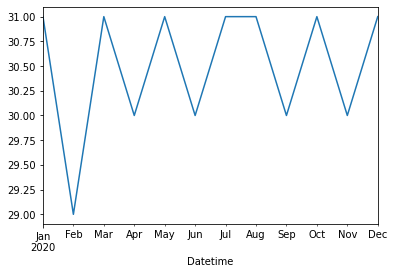

In [65]:
# Check the number of entries given by month using the datetime column and the method dt.to_period()
dti['Datetime']=pd.to_datetime(dti['Datetime']) # As confirmation, but generated as datetime range should work
dti.groupby(dti['Datetime'].dt.to_period('M')).size().plot.line()

In [66]:
# To add a column of random numbers
dti['rand']=pd.Series(np.random.rand(len(dti)))
dti.head()

,Datetime,month,weekday,day,rand
0,2020-01-01,1,2,1,0.355318
1,2020-01-02,1,3,2,0.131198
2,2020-01-03,1,4,3,0.348824
3,2020-01-04,1,5,4,0.747498
4,2020-01-05,1,6,5,0.981008


In [67]:
# The sum of the random values for every Wednesday.
dti[dti.weekday == 2].rand.sum()

26.577131374817114

In [68]:
# For each month find the mean
dti.groupby('month').rand.mean()

month
1     0.417629
2     0.455777
3     0.555848
4     0.522776
5     0.463668
6     0.485486
7     0.565052
8     0.622776
9     0.494220
10    0.457009
11    0.497698
12    0.535530
Name: rand, dtype: float64

In [69]:
# Convert the index to a datatime index
dti.set_index('Datetime').head()

,month,weekday,day,rand
Datetime,,,,
2020-01-01,1,2,1,0.355318
2020-01-02,1,3,2,0.131198
2020-01-03,1,4,3,0.348824
2020-01-04,1,5,4,0.747498
2020-01-05,1,6,5,0.981008


In [70]:
# For each group of four consecutive months, 
#find the date on which the highest value occurred.
dti_2 = dti['Datetime']
s = pd.Series(np.random.rand(len(dti_2)), index=dti_2)
s.groupby(pd.Grouper(freq='4M')).idxmax()

Datetime
2020-01-31   2020-01-26
2020-05-31   2020-03-30
2020-09-30   2020-08-04
2021-01-31   2020-11-20
Freq: 4M, dtype: datetime64[ns]

In [71]:
# Selecting data for certain times
s['2020-01-01 00:00:00':'2020-01-03 5:00:00']

Datetime
2020-01-01    0.671236
2020-01-02    0.189268
2020-01-03    0.567738
dtype: float64

In [72]:
# Resample for months frequency
s.resample('M').mean()

Datetime
2020-01-31    0.554427
2020-02-29    0.529918
2020-03-31    0.516137
2020-04-30    0.466870
2020-05-31    0.490058
2020-06-30    0.544826
2020-07-31    0.546691
2020-08-31    0.514675
2020-09-30    0.474130
2020-10-31    0.493052
2020-11-30    0.517575
2020-12-31    0.403774
Freq: M, dtype: float64

In [73]:
# Rolling sum for a period of 3
dti.rolling(3).sum()

,month,weekday,day,rand
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,3.0,9.0,6.0,0.835341
3,3.0,12.0,9.0,1.227520
4,3.0,15.0,12.0,2.077330
...,...,...,...,...
361,36.0,15.0,78.0,2.173491
362,36.0,11.0,81.0,2.109717
363,36.0,7.0,84.0,2.527947
364,36.0,3.0,87.0,2.525688


## Statistics with pandas

In [74]:
# Calculate the median
df_5.Budget.median()

49.0

## To graph from dataframe

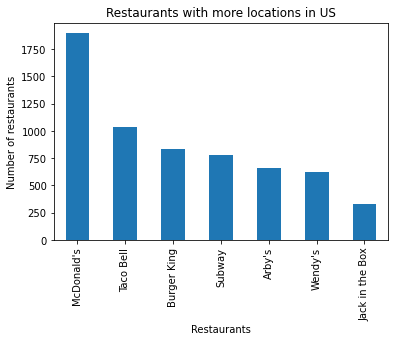

In [75]:
#To graph from dataframe
The_top.plot(kind='bar', x='name', y='city', legend=None)
plt.xlabel('Restaurants')
plt.ylabel('Number of restaurants')
plt.title('Restaurants with more locations in US')
plt.show()

<AxesSubplot:xlabel='productivity', ylabel='hours_in'>

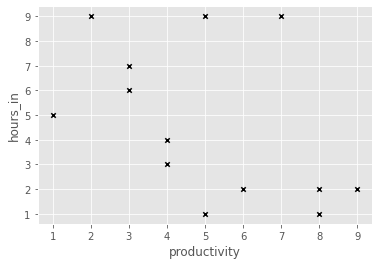

In [76]:
#%matplotlib inline tells the notebook to show plots inline, instead of creating them in a separate window.
#plt.style.use('ggplot') is a style theme based upon the styling of R's #ggplot package.
#To make a scatter plot of random data, but use black X's instead of the default markers.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df_15 = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[2,2,2,1,2,2,2,2,1,1,2,1,0]})
df_15.plot.scatter("productivity", "hours_in", color = "black", marker = "x")

<AxesSubplot:xlabel='productivity', ylabel='hours_in'>

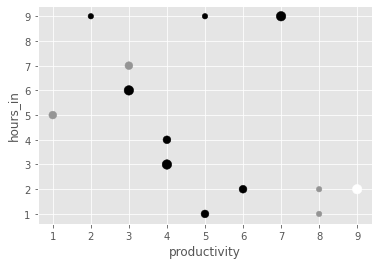

In [77]:
# Use columns in the DataFrame to modify colors and sizes.
df_15.plot.scatter("productivity", "hours_in", s = df_15.happiness * 30, c = df_15.caffienated)

(-1.0, 12.0)

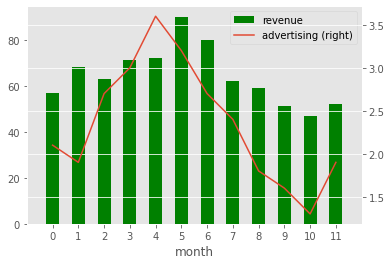

In [78]:
#Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)
df_16 = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
ax = df_16.plot.bar("month", "revenue", color = "green")
df_16.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))

In [79]:
# Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly
#summaries of the opening, highest, lowest, and closing prices
# Helper function
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)
def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()
# Solving the exercise
df = day_stock_data()
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2021-01-01 09:00:00,100.000000,101.294293,99.749266,100.805441,green
2021-01-01 10:00:00,100.715146,102.589106,100.257408,102.134825,green
2021-01-01 11:00:00,102.195367,103.434836,101.261777,101.672111,red
2021-01-01 12:00:00,101.657553,102.591661,100.273400,101.646798,red
2021-01-01 13:00:00,101.695880,102.612992,100.705003,102.144862,green


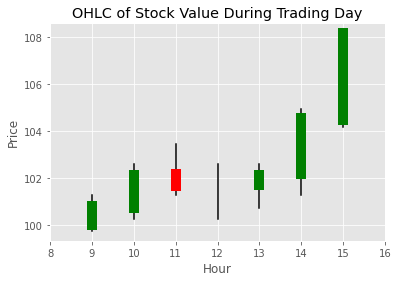

In [80]:
# Plot a candlestick chart
plot_candlestick(agg)